In [149]:
import pandas as pd 
import pickle
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
with open('./results_1p0.pkl', 'rb') as file:
    results_dict = pickle.load(file)

In [31]:
results_dict['Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=90)']

{'Total Number of Frames': 13870,
 'Total Number of Games': 120,
 'Record Length': 5,
 'Average Score across Games': 0.4166666666666667,
 'Mean(Last 20 Games Length)': 0.95,
 'Stdev(Last 20 Games Length)': 1.16081867662439,
 'Mean(Efficiency Score(Last 20 Games Length))': 0.399431611571796,
 'Stdev(Efficiency Score(Last 20 Games Length))': 0.47592055610994005}

In [29]:
df = pd.DataFrame()
for test, test_res in results_dict.items():
  temp_df = pd.DataFrame([test_res], index=[test])
  df = pd.concat([df, temp_df])

In [30]:
df

,Total Number of Frames,Total Number of Games,Record Length,Average Score across Games,Mean(Last 20 Games Length),Stdev(Last 20 Games Length),Mean(Efficiency Score(Last 20 Games Length)),Stdev(Efficiency Score(Last 20 Games Length))
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=90)",13870,120,5,0.416667,0.95,1.160819,0.399432,0.475921
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=70)",15480,120,4,0.383333,0.70,1.187434,0.104148,0.187637
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",16802,120,4,0.441667,1.00,1.264911,0.103846,0.168819
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=80)",20273,120,3,0.441667,1.05,0.973396,0.226286,0.320776
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=90)",20609,120,4,0.475000,1.10,1.135782,0.207970,0.340398
...,...,...,...,...,...,...,...,...
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.9, EPSILON=0.5, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",21142,120,25,3.791667,10.50,6.249000,0.968496,0.487505
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.9, EPSILON=0.5, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=90)",22619,120,43,5.641667,13.05,12.383356,0.914129,0.227111
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.9, EPSILON=0.5, EPSILON_FLOOR=0.04, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=70)",24517,120,32,5.083333,15.30,7.287661,0.919875,0.119028
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.9, EPSILON=0.5, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",38268,120,3,0.141667,0.05,0.217945,0.018750,0.081729


In [43]:
df = df.drop('Total Number of Games', axis=1)

### Let's observe distribution of results

In [44]:
df.columns

Index(['Total Number of Frames', 'Record Length', 'Average Score across Games',
       'Mean(Last 20 Games Length)', 'Stdev(Last 20 Games Length)',
       'Mean(Efficiency Score(Last 20 Games Length))',
       'Stdev(Efficiency Score(Last 20 Games Length))'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Total Number of Frames'}>,
        <AxesSubplot: title={'center': 'Record Length'}>],
       [<AxesSubplot: title={'center': 'Average Score across Games'}>,
        <AxesSubplot: title={'center': 'Mean(Last 20 Games Length)'}>],
       [<AxesSubplot: title={'center': 'Stdev(Last 20 Games Length)'}>,
        <AxesSubplot: title={'center': 'Mean(Efficiency Score(Last 20 Games Length))'}>],
       [<AxesSubplot: title={'center': 'Stdev(Efficiency Score(Last 20 Games Length))'}>,
        <AxesSubplot: >]], dtype=object)

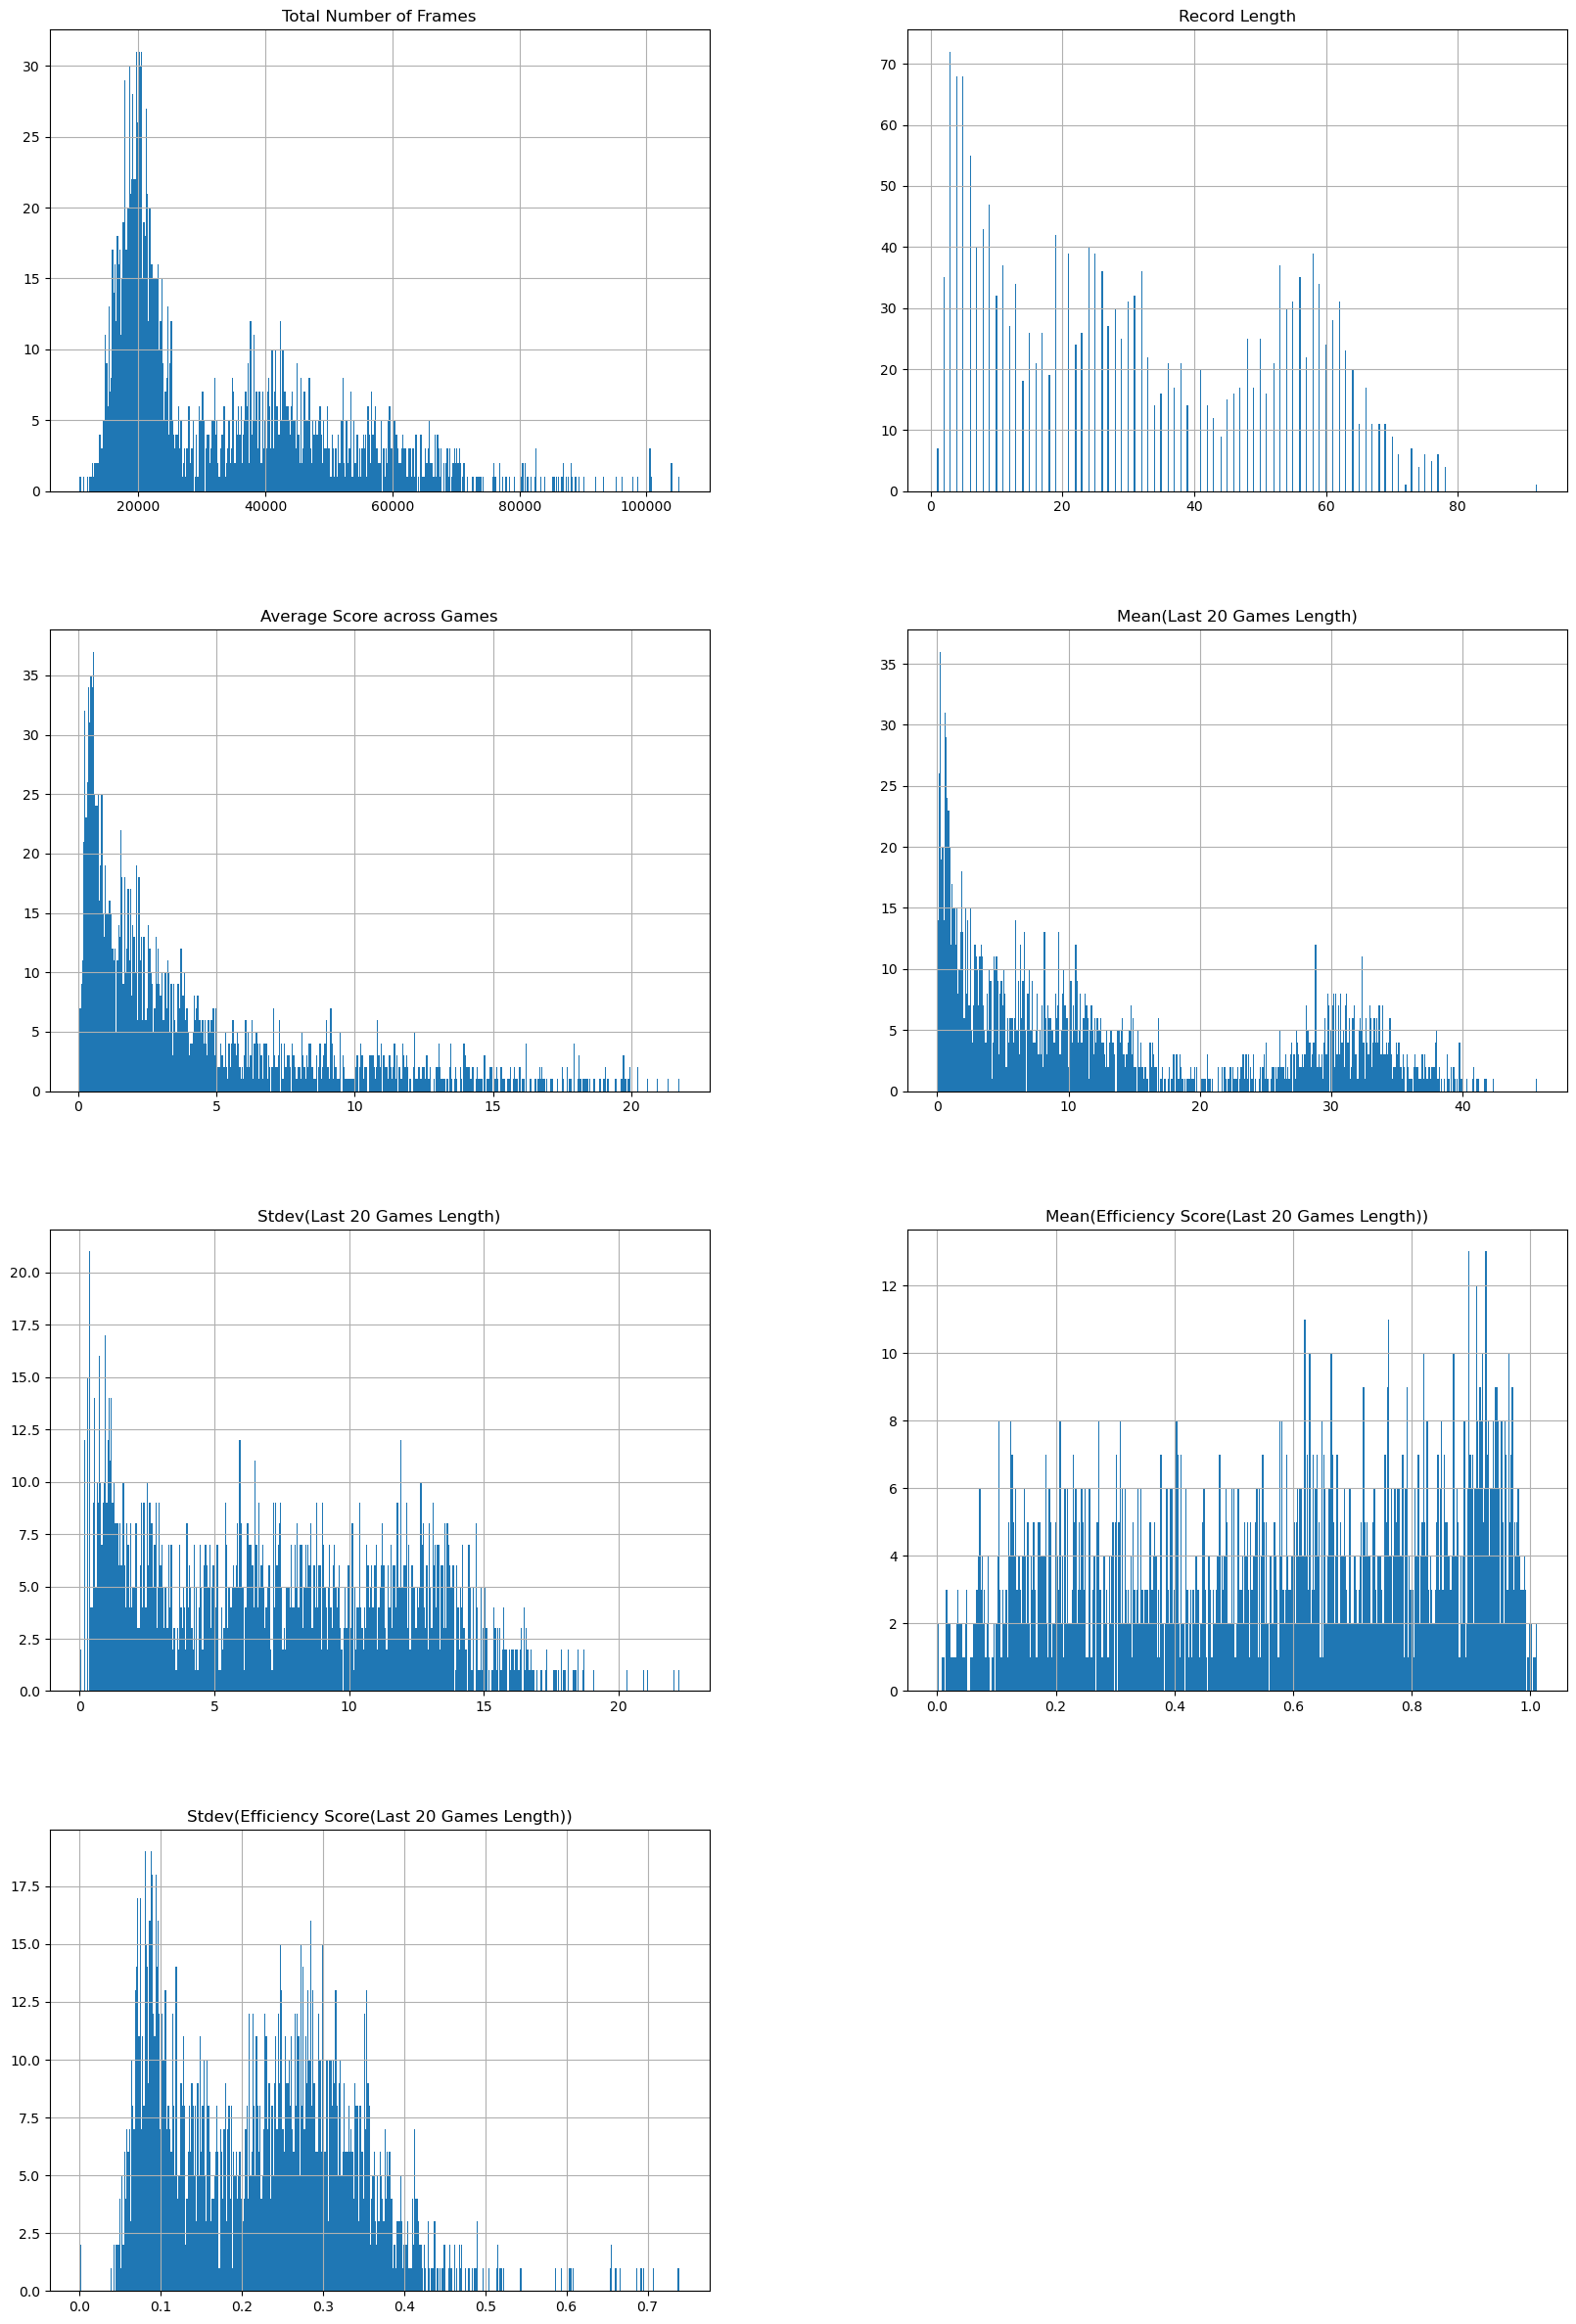

In [116]:
df.hist(bins=500, figsize=(20,30), layout=(4,2))

As a result of hyperparam search, the best performance with base model is 
* 'Total Number of Frames':                          ~ 100,000 frames
* 'Record Length':                                   ~ 75 length
* 'Mean(Last 20 Games Length)':                      ~ 40 length
* 'Mean(Efficiency Score(Last 20 Games Length))':    ~ 0.95

### Let's find good parameters

In [60]:
# function to tell the param commonalities between a list of indices
def parse_agent_strings(agent_strings):
    # Initialize a defaultdict to store lists for each parameter
    params = defaultdict(list)

    # Regular expression to match key-value pairs in the format KEY=VALUE
    pattern = r'(\w+)=([\w\.\-]+)'

    for agent_string in agent_strings:
        # Find all key-value pairs in the current string
        matches = re.findall(pattern, agent_string)
        
        # For each key-value pair, store the value in the corresponding list
        for key, value in matches:
            if value.isdigit():
                params[key].append(int(value))
            else:
                try:
                    params[key].append(float(value))
                except ValueError:
                    # If the value is not a number, keep it as a string (e.g., True, False)
                    params[key].append(value)
    
    # Remove duplicates by converting lists to sets and back to lists
    return {key: list(set(values)) for key, values in params.items()}


In [147]:
# create histograms for parameters
def plot_agent_strings_params(agent_strings):
    # Initialize a defaultdict to store lists for each parameter
    params = defaultdict(list)

    # Regular expression to match key-value pairs in the format KEY=VALUE
    pattern = r'(\w+)=([\w\.\-]+)'

    # Iterate through each agent string
    for agent_string in agent_strings:
        # Find all key-value pairs in the current string
        matches = re.findall(pattern, agent_string)
        
        # For each key-value pair, store the value in the corresponding list
        for key, value in matches:
            # Convert numerical values to int or float if possible
            if value.isdigit():
                params[key].append(int(value))
            else:
                try:
                    params[key].append(float(value))
                except ValueError:
                    # If the value is not a number, keep it as a string (e.g., True, False)
                    params[key].append(value)
    
    # Now we'll go through each key and create a histogram
    for key, values in params.items():
        # Create a pandas Series from the values list
        values_series = pd.Series(values)
        
        # Get the value counts (frequency) for the values in this key
        value_counts = values_series.value_counts()
        
        # Plot the histogram (bar chart) for this key
        value_counts.plot(kind='bar', edgecolor='black')
        plt.title(f'Histogram of {key}')
        plt.xlabel(key)
        plt.ylabel('Count')
        plt.show()


In [187]:
# let's see if there are any runs that have all the ideal criteria...
filtered_df = df[(df['Record Length'] >= 70) &\
                 (df['Mean(Last 20 Games Length)'] >= 40) 
#                  (df['Mean(Efficiency Score(Last 20 Games Length))'] >= 0.95) &\  # not directly corr w/ success
#                  (df['Total Number of Frames'] >= 100000)                         # not directly corr w/ success
                ]

filtered_df

,Total Number of Frames,Record Length,Average Score across Games,Mean(Last 20 Games Length),Stdev(Last 20 Games Length),Mean(Efficiency Score(Last 20 Games Length)),Stdev(Efficiency Score(Last 20 Games Length))
"Agent(MAX_MEMORY=100000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=80)",66262,71,10.850000,41.70,12.033703,0.586427,0.069563
"Agent(MAX_MEMORY=100000, BATCH_SIZE=1000, ALPHA=0.005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=70)",62853,73,15.658333,41.15,14.255788,0.717876,0.137577
"Agent(MAX_MEMORY=100000, BATCH_SIZE=5000, ALPHA=0.001, GAMMA=0.8, EPSILON=0.5, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",66494,72,16.191667,41.00,14.442991,0.871208,0.072002
"Agent(MAX_MEMORY=200000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",79162,78,14.041667,45.65,14.789439,0.639360,0.066642


**Training is still quite unstable!**
* In multi-threading, setting seed for each agent wasn't functional, since global seed state was shared by multiple threads and thus the seed RNG was "incremented" by threads sharing global memory. This turns out to be good, as it exposed that training still needs to be stabalized. 
* When replicating the performant tests above with `interactive_mode=True` and running serially (to guarentee seed consistency and reproducibility), there was fairly high performance variance, suggesting that the above parameter settings are not universally performant:
    * *Agent(MAX_MEMORY=100000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=80)*
        * Record Length:                                      53 (vs 71)
        * Mean(Last 20 Games Length):                         21.75 (vs 41.70)
    * *Agent(MAX_MEMORY=100000, BATCH_SIZE=1000, ALPHA=0.005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=70)*
        * Record Length:                                      63 (vs 73)
        * Mean(Last 20 Games Length):                         25.5 (vs 41.15)
    * *Agent(MAX_MEMORY=100000, BATCH_SIZE=5000, ALPHA=0.001, GAMMA=0.8, EPSILON=0.5, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)*
        * Record Length:                                      49 (vs 72)
        * Mean(Last 20 Games Length):                         14.05 (vs 41.00)
    * *Agent(MAX_MEMORY=200000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)*
        * Record Length:                                      68 (vs 78)	
        * Mean(Last 20 Games Length):                         38.9 (vs 45.65)


I believe the culprit is replay buffer training:
* replay buffer is only used for training once per episode, while it is often done
* every time step, only the most recent frame is used for training --> counteracts principle of replay buffer making learning more generalizable by NOT training with only consecutive (highly correlated) time steps
* **Solutions to try for Phase 1.5**:
    * introduce Alpha Decay
    * introduce more frequent Replay Buffer training, and play more with much smaller MAX_MEMORY and BATCH_SIZE
        * currently, in some cases Replay Buffer is too big (stores more frames than total frames over all episodes)
        * however, as proof of concept, for     
            * *Agent(MAX_MEMORY=100000, BATCH_SIZE=5000, ALPHA=0.001, GAMMA=0.8, EPSILON=0.5, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)*
        * when trained with same parameters (MAX_MEMORY and BATCH_SIZE too big) does much better in training!
            * Record Length:                                      73 (vs 49 vs 72)
            * Mean(Last 20 Games Length):                         33.3 (vs 14.05 vs 41.00)
                * the variance in performance based on random seed is much smaller -- increasing replay buffer sampling+training every few time steps (instead of every episode) greatly helps stabalize training
                    * was also quite slow... will run a smaller hyperparamter search with these new features since I don't have GPUs...
                    * parameters that didn't quite look good in the analysis below will not be included in Phase 1.5 hyperparameter search



In [180]:
cum_params = parse_agent_strings(filtered_df.index)
cum_params

{'MAX_MEMORY': [50000, 200000, 100000],
 'BATCH_SIZE': [5000, 1000],
 'ALPHA': [0.005, 0.001],
 'GAMMA': [0.7, 0.8],
 'EPSILON': [0.3, 0.4, 0.5],
 'EPSILON_FLOOR': [0.0],
 'EPSILON_LIN_DEC': ['True', 'False'],
 'EPSILON_DEC_LIM': [80, 90, 70]}

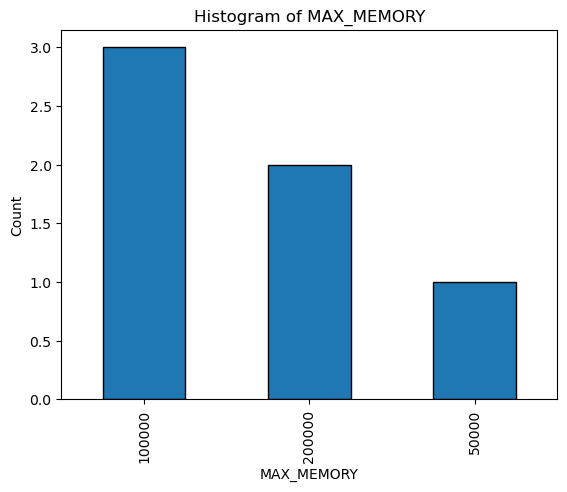

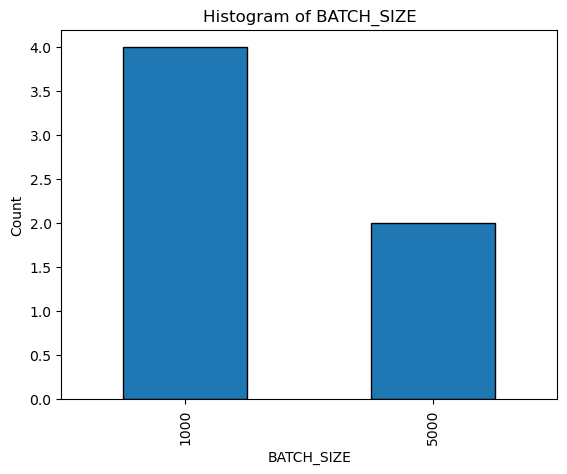

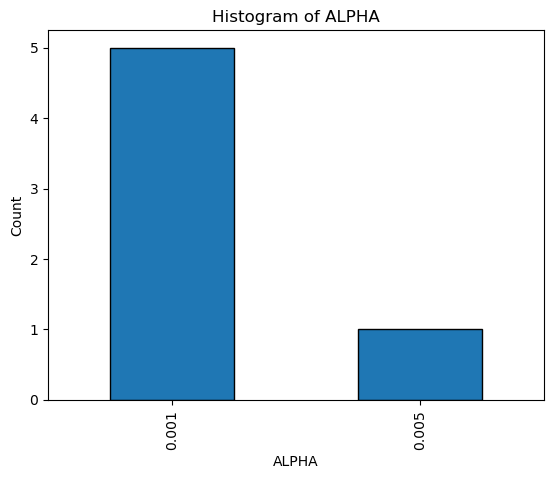

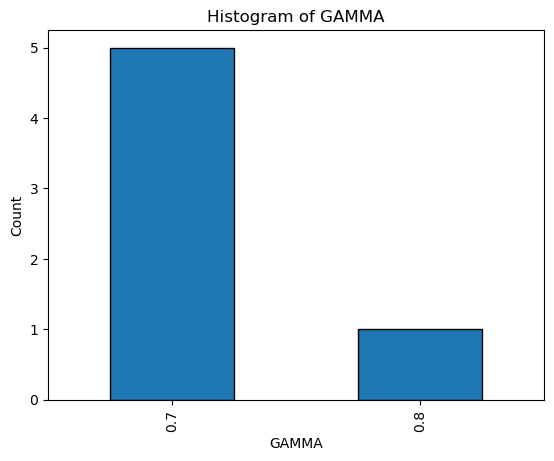

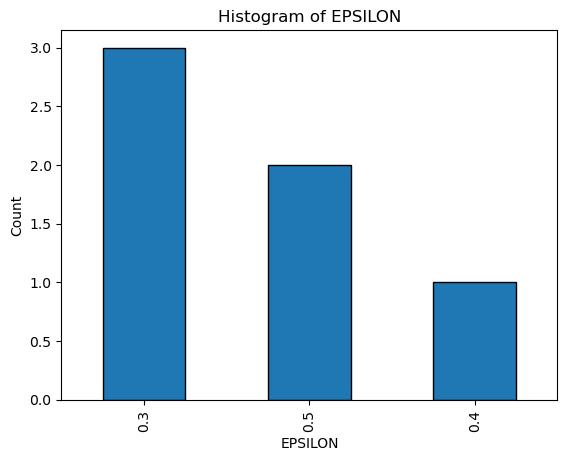

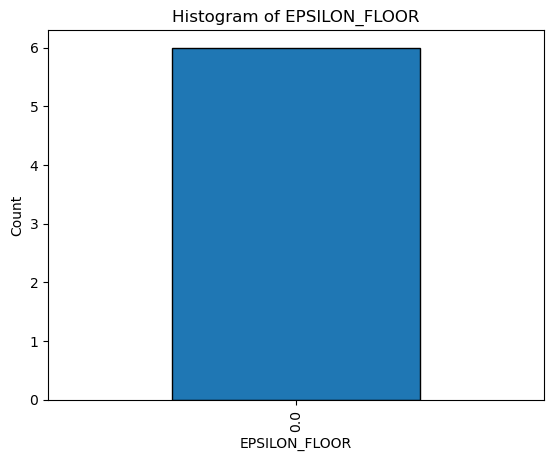

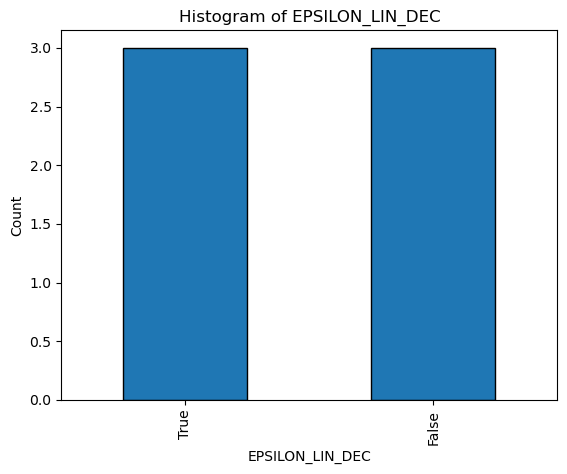

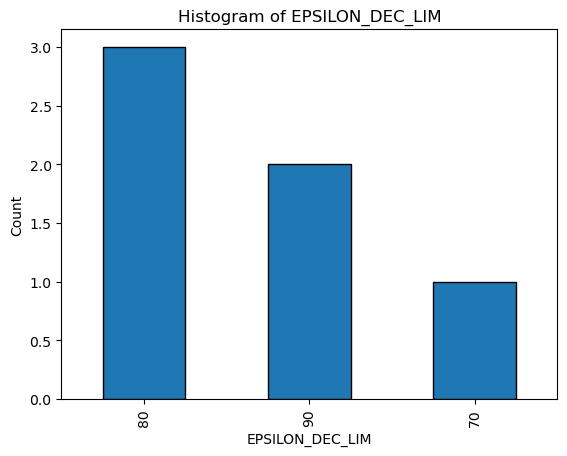

In [182]:
plot_agent_strings_params(filtered_df.index)

In [181]:
total_comb = 1
for k,v in cum_params.items():
  total_comb *= len(v)
total_comb

432

In [164]:
# more lenient to ideal criteria...
broad_df = df[(df['Record Length'] >= 60) &\
                 (df['Mean(Last 20 Games Length)'] >= 35) 
#                  (df['Mean(Efficiency Score(Last 20 Games Length))'] >= 0.95) &\  # not directly corr w/ success
#                  (df['Total Number of Frames'] >= 100000)                         # not directly corr w/ success
                ]
broad_df

,Total Number of Frames,Record Length,Average Score across Games,Mean(Last 20 Games Length),Stdev(Last 20 Games Length),Mean(Efficiency Score(Last 20 Games Length)),Stdev(Efficiency Score(Last 20 Games Length))
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.0005, GAMMA=0.9, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=70)",66862,61,14.125000,36.25,11.924240,0.936682,0.087434
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=70)",70468,64,15.783333,40.35,13.089213,0.642072,0.092209
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=70)",104010,60,18.908333,40.75,10.972124,0.598157,0.069393
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=70)",69723,62,9.141667,38.25,11.802013,0.652579,0.098943
"Agent(MAX_MEMORY=50000, BATCH_SIZE=1000, ALPHA=0.001, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80)",82515,68,16.666667,36.95,11.412603,0.717380,0.147703
...,...,...,...,...,...,...,...
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.001, GAMMA=0.8, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=70)",65579,65,18.058333,36.10,14.992998,0.945072,0.073440
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.001, GAMMA=0.8, EPSILON=0.5, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=90)",40287,65,8.400000,38.85,14.694472,0.908501,0.103831
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=80)",49744,69,11.058333,38.40,16.692513,0.706514,0.142372
"Agent(MAX_MEMORY=200000, BATCH_SIZE=5000, ALPHA=0.005, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=True, EPSILON_DEC_LIM=70)",64401,69,13.216667,38.05,17.758026,0.568708,0.080269


In [219]:
cum_param_b = parse_agent_strings(broad_df.index)
total_comb = 1
for k,v in cum_param_b.items():
  total_comb *= len(v)
total_comb

972

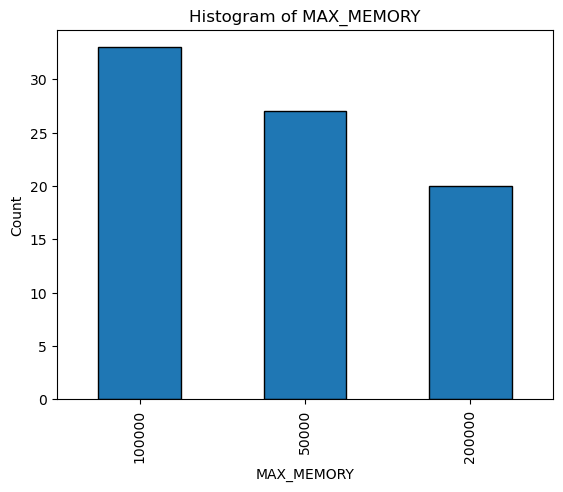

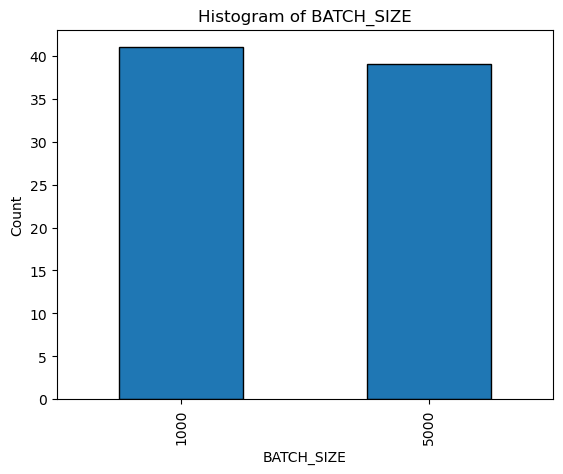

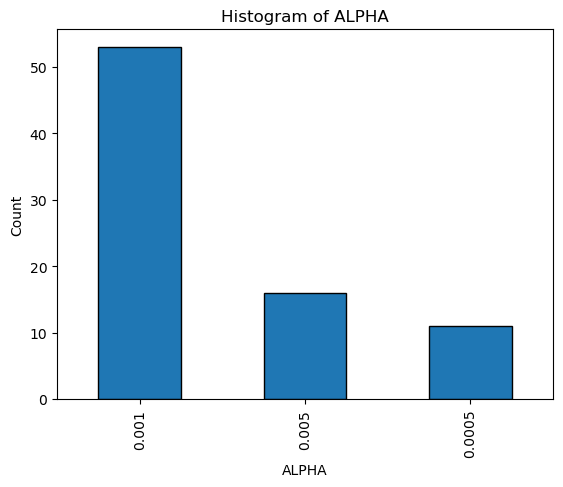

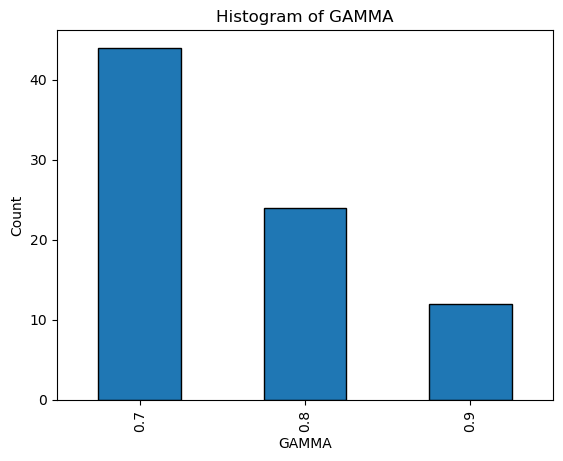

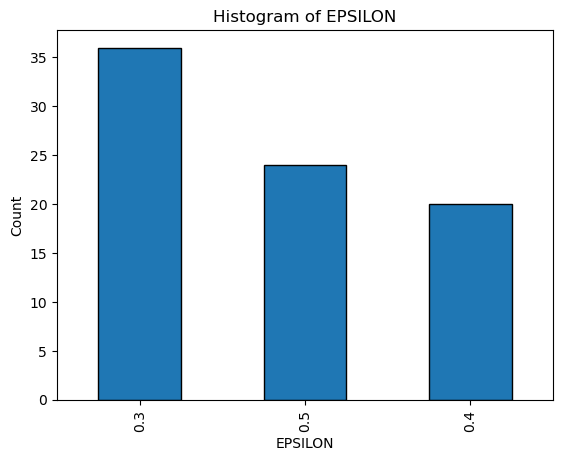

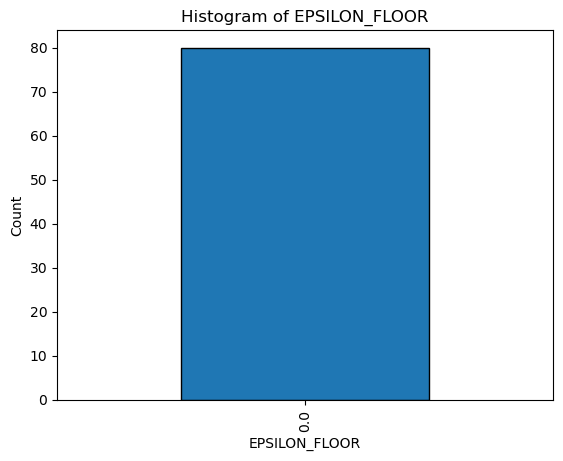

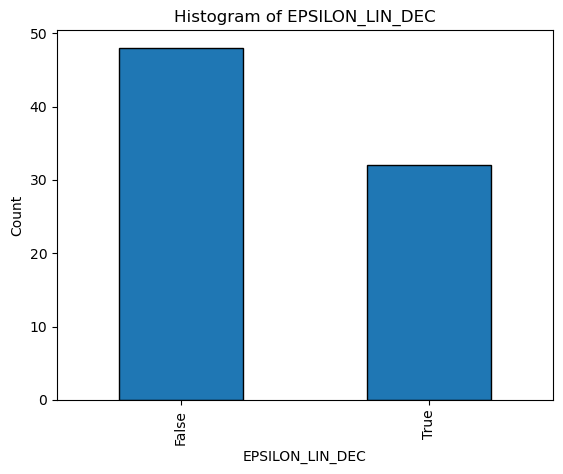

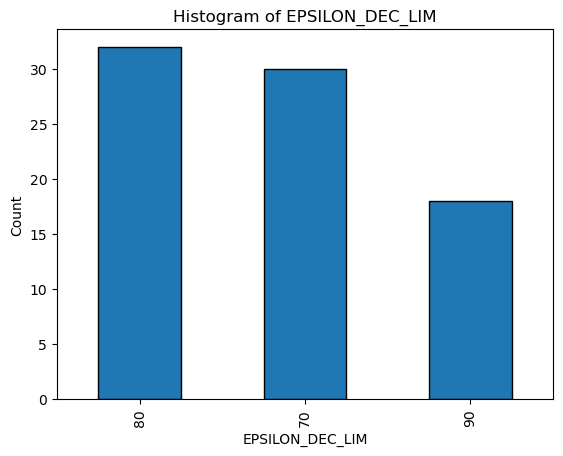

In [165]:
plot_agent_strings_params(broad_df.index)

In [166]:
# stratify based on MAX_MEMORY
str_to_analyze = broad_df.index
mm_50 = []
mm_100 = []
mm_200 = []
for st in str_to_analyze:
  if "MAX_MEMORY=50000" in st:
    mm_50.append(st)
  elif "MAX_MEMORY=100000" in st:
    mm_100.append(st)
  elif "MAX_MEMORY=200000" in st:
    mm_200.append(st)
assert(len(mm_50)+len(mm_100)+len(mm_200) == len(str_to_analyze))

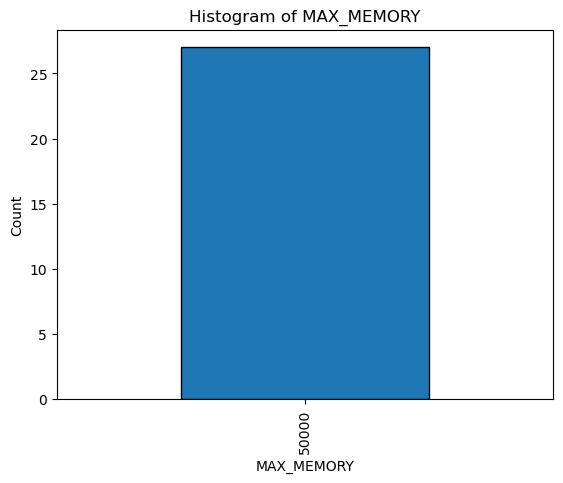

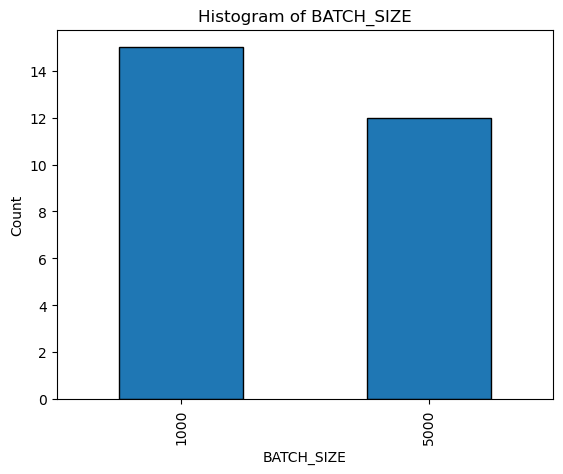

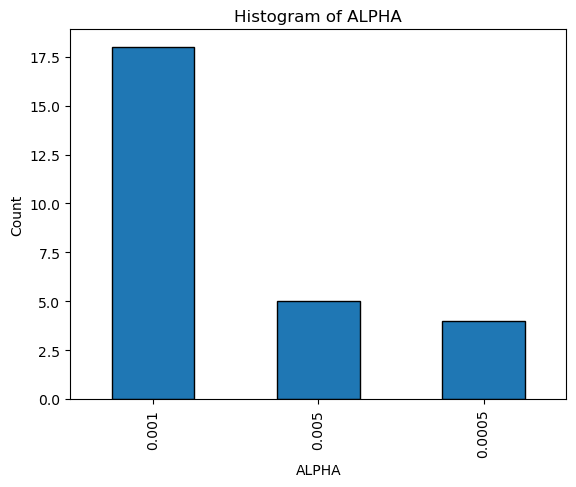

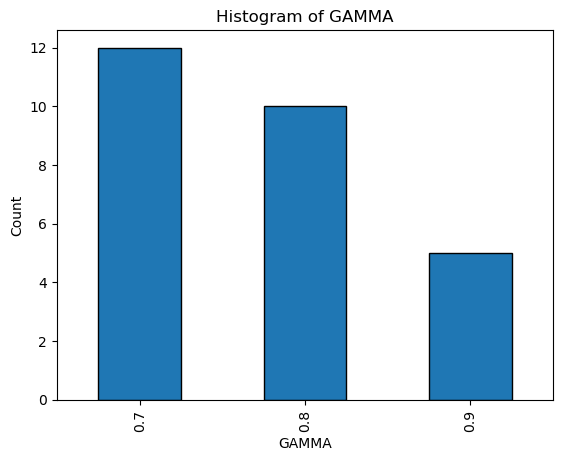

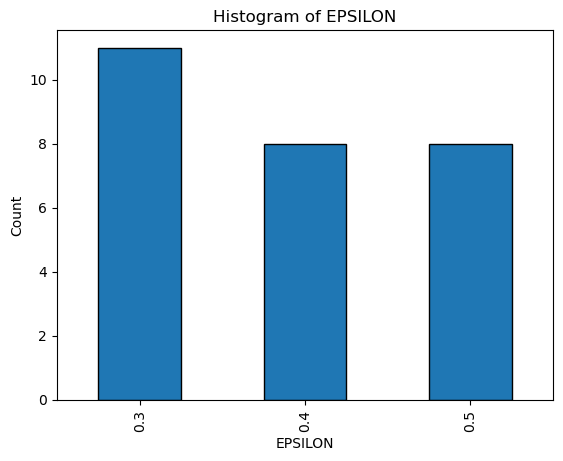

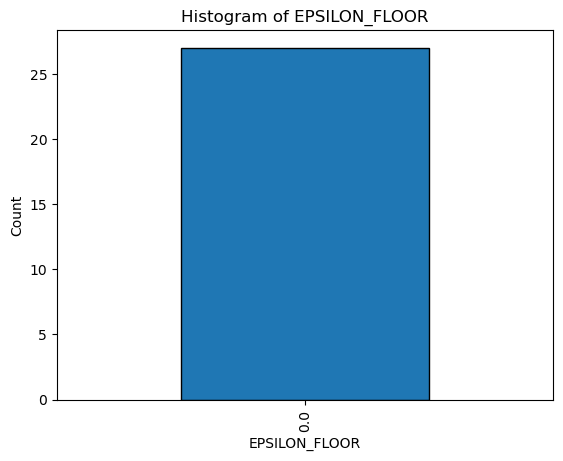

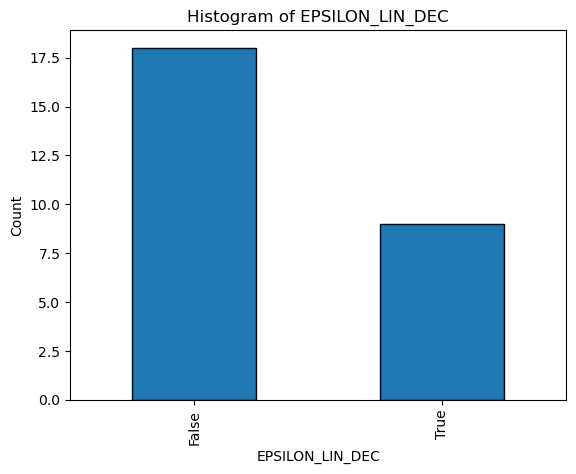

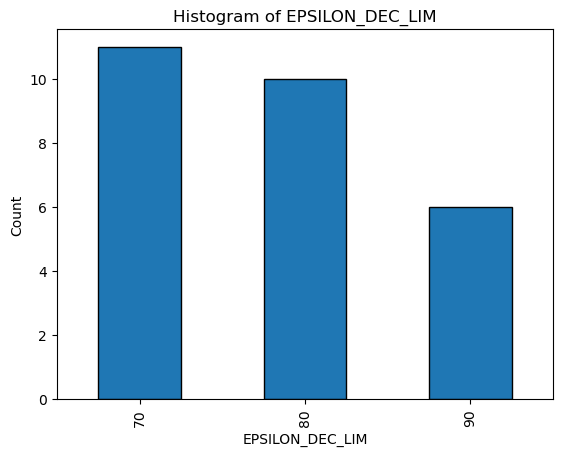

In [167]:
plot_agent_strings_params(mm_50)

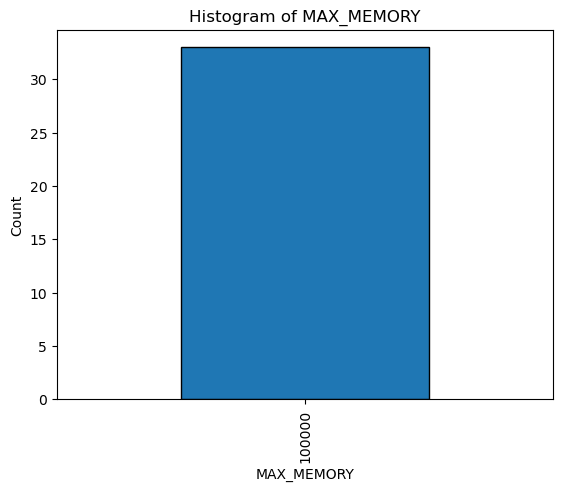

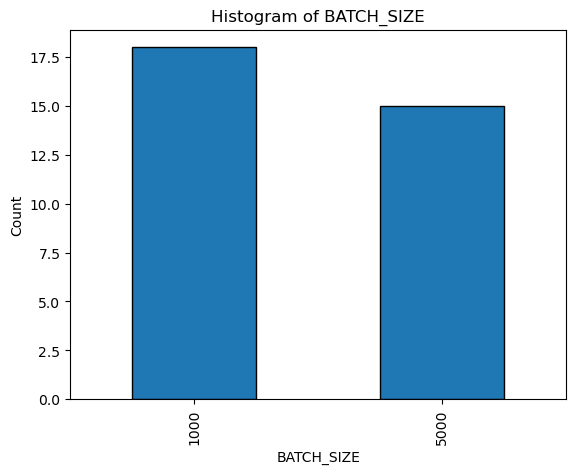

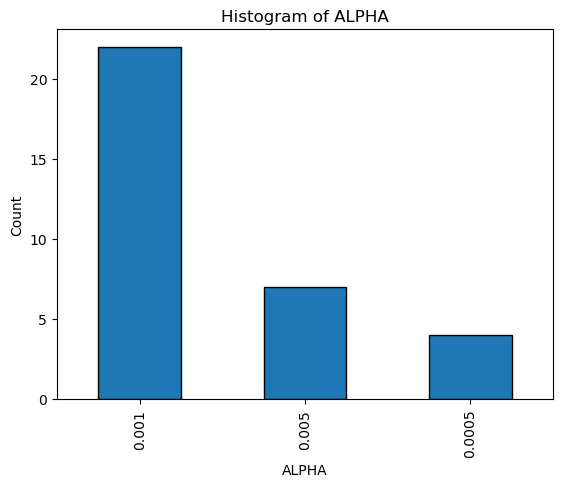

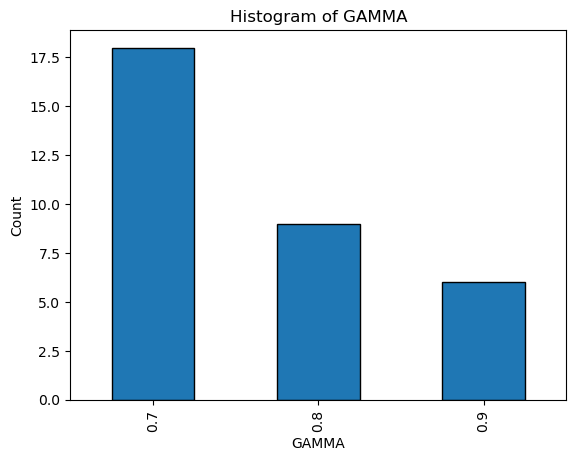

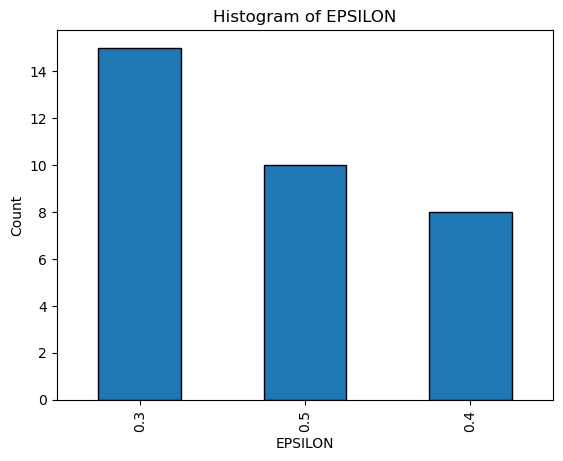

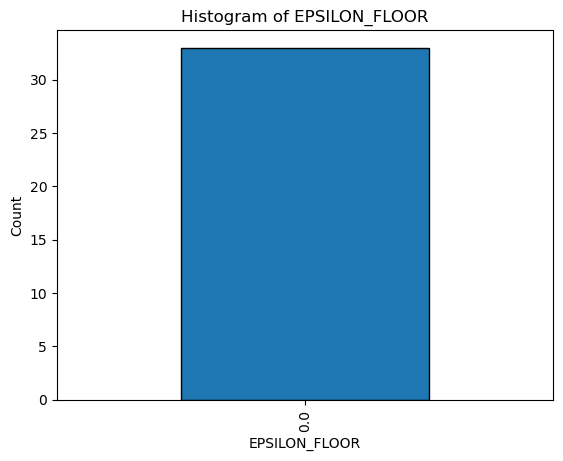

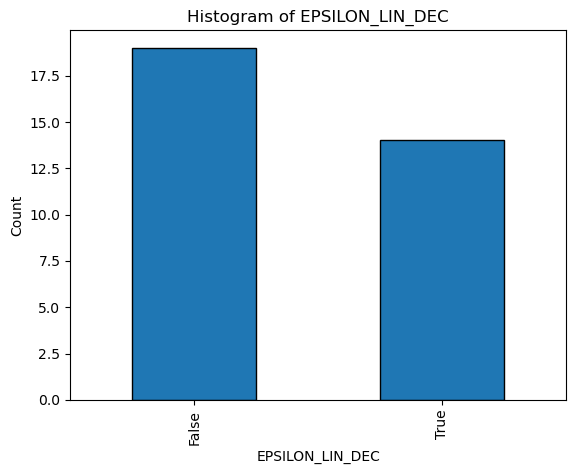

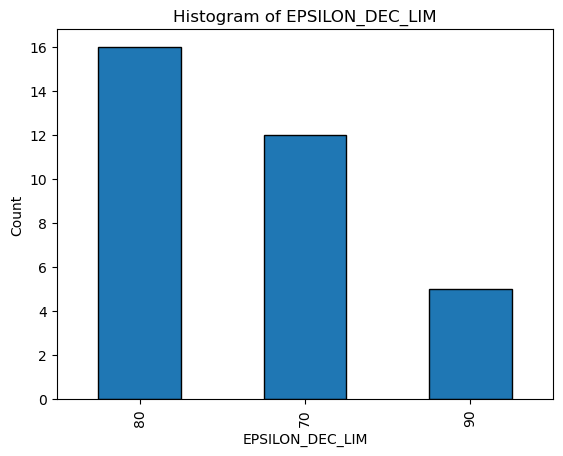

In [168]:
plot_agent_strings_params(mm_100)

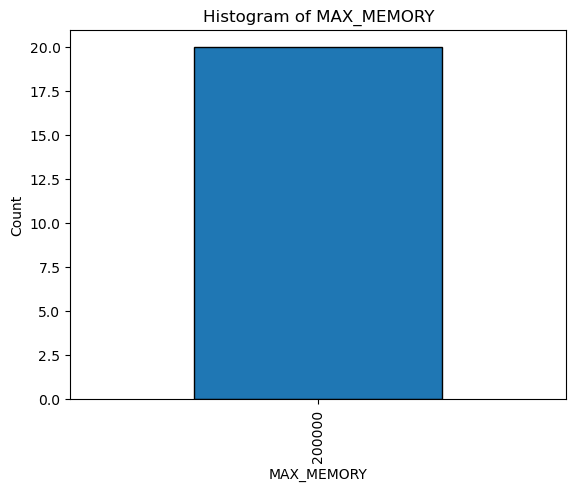

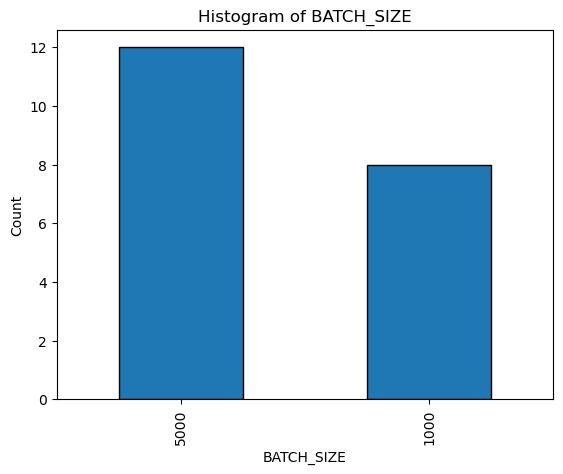

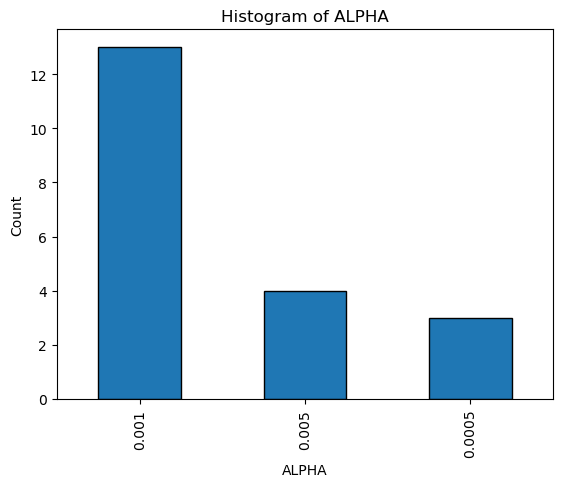

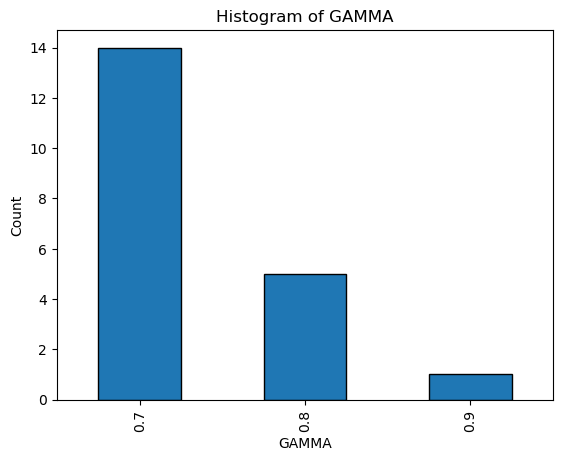

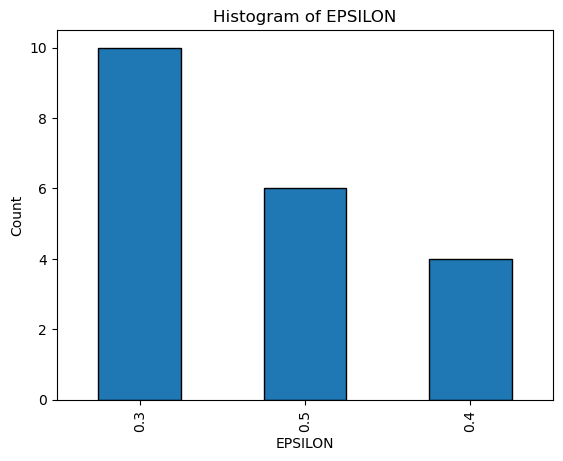

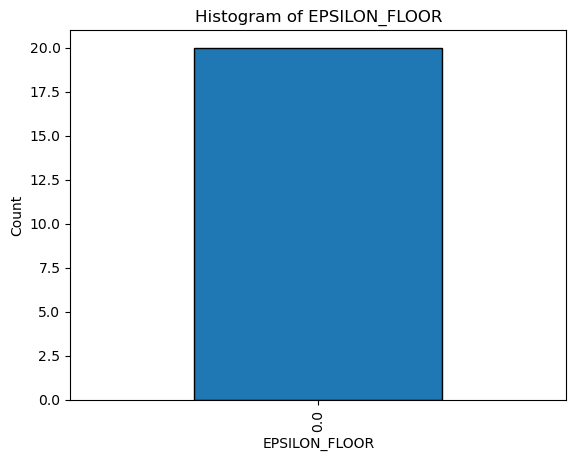

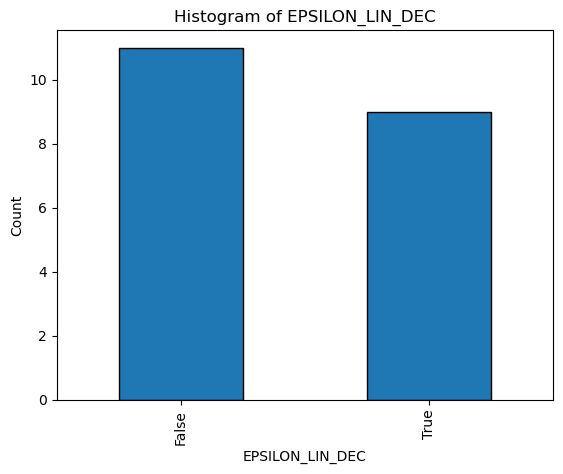

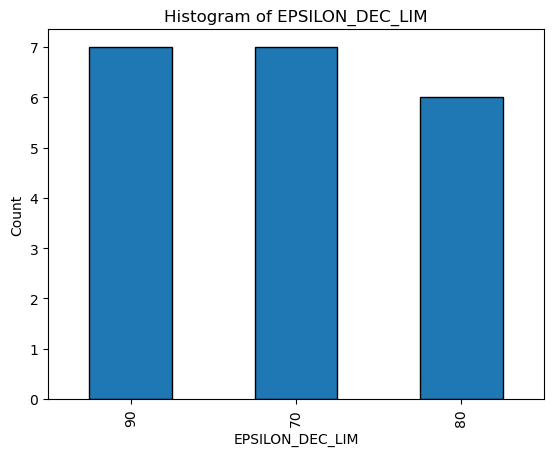

In [169]:
plot_agent_strings_params(mm_200)

In [172]:
# stratify based on ALPHA
str_to_analyze = broad_df.index
alpha_0p001 = []
for st in str_to_analyze:
  if "ALPHA=0.001" in st:
    alpha_0p001.append(st)

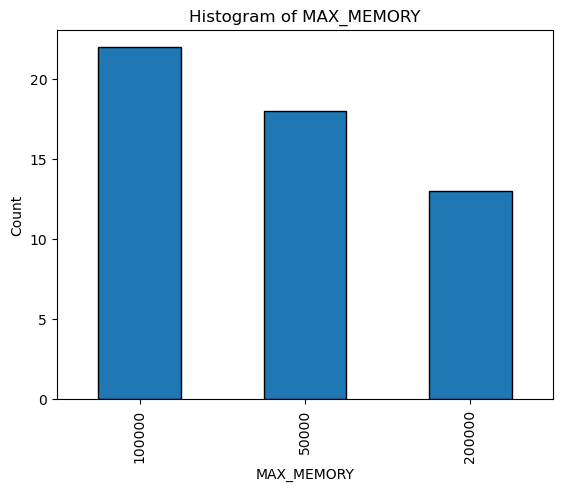

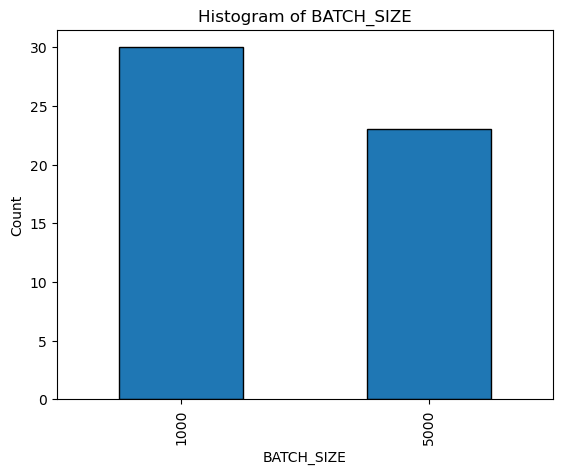

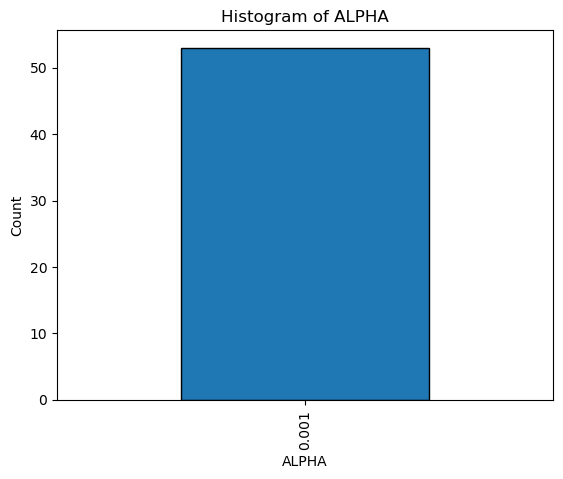

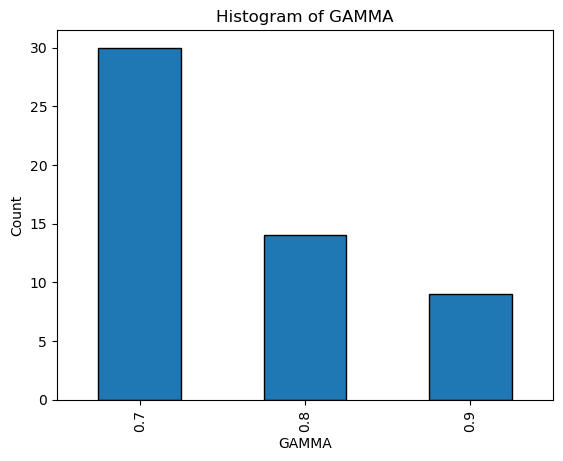

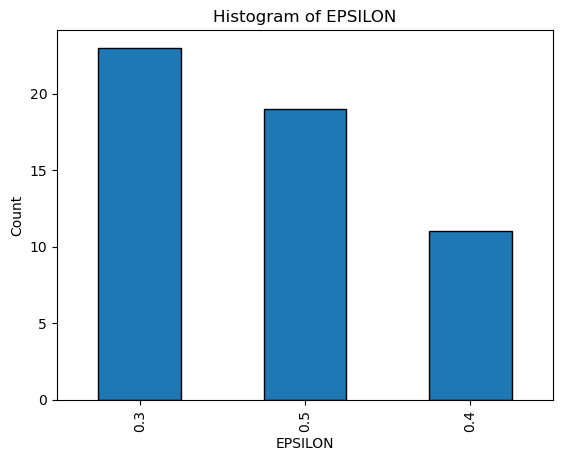

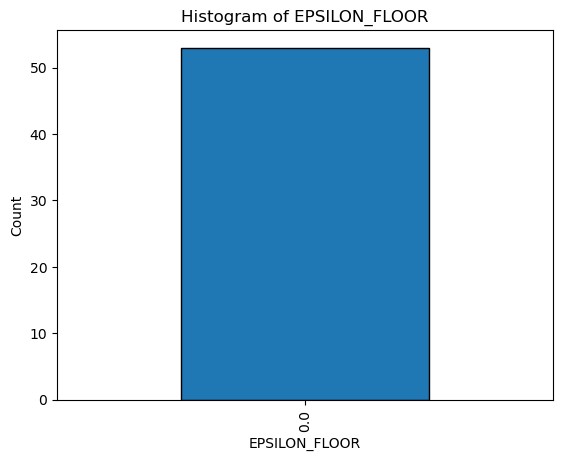

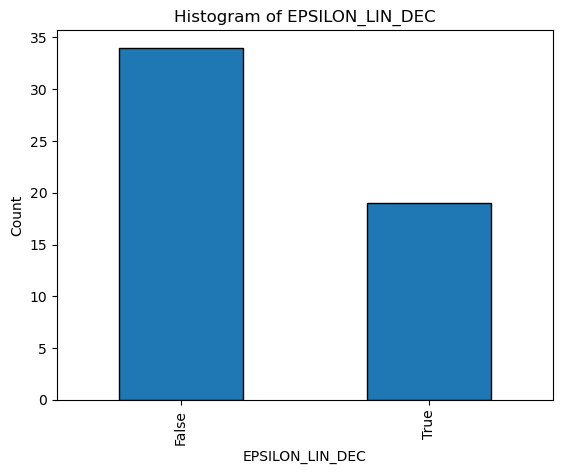

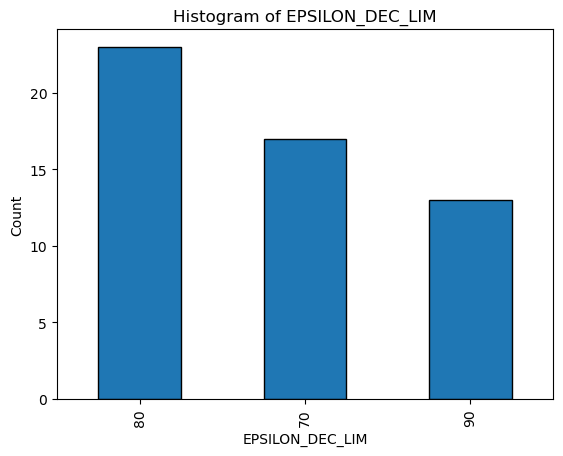

In [173]:
plot_agent_strings_params(alpha_0p001)

In [175]:
# stratify based on GAMMA
str_to_analyze = broad_df.index
gamma_0p7 = []
gamma_0p8 = []
for st in str_to_analyze:
  if "GAMMA=0.7" in st:
    gamma_0p7.append(st)
  elif "GAMMA=0.8" in st:
    gamma_0p8.append(st)

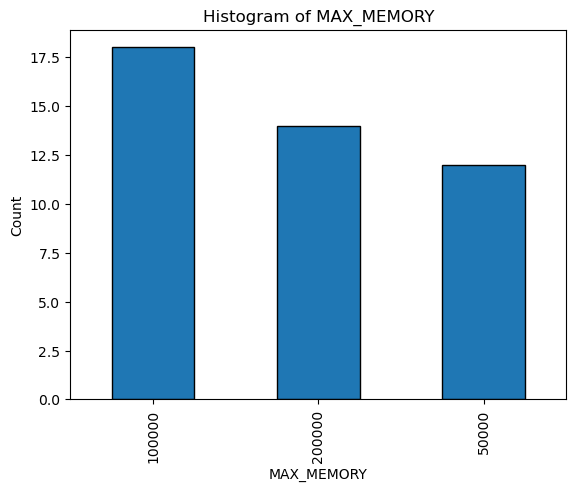

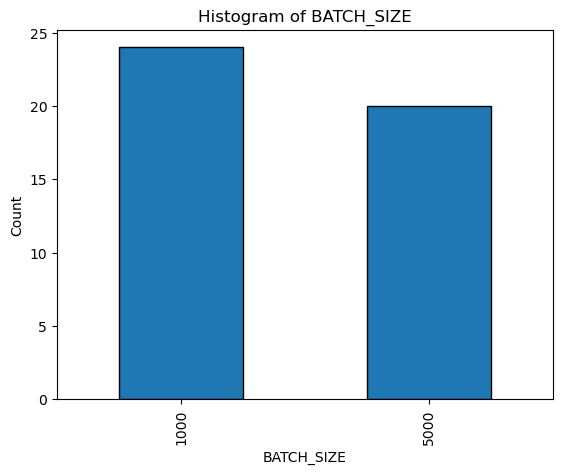

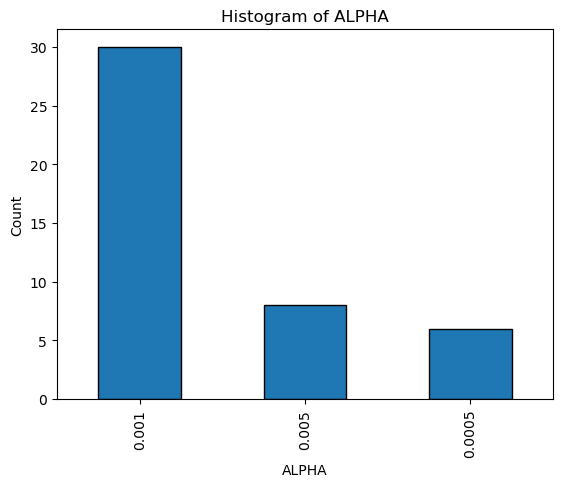

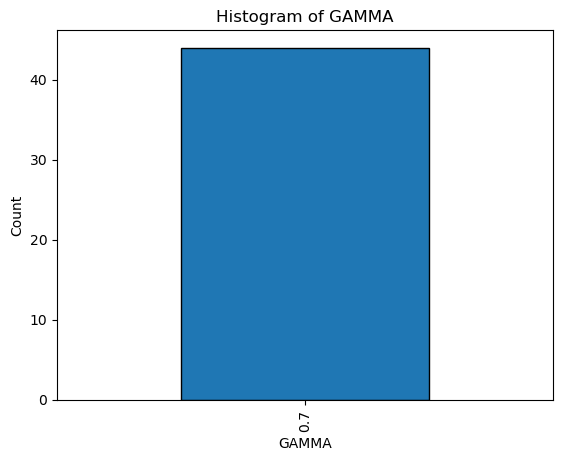

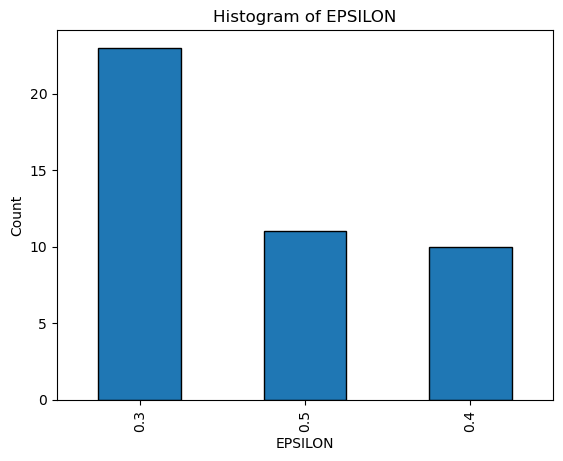

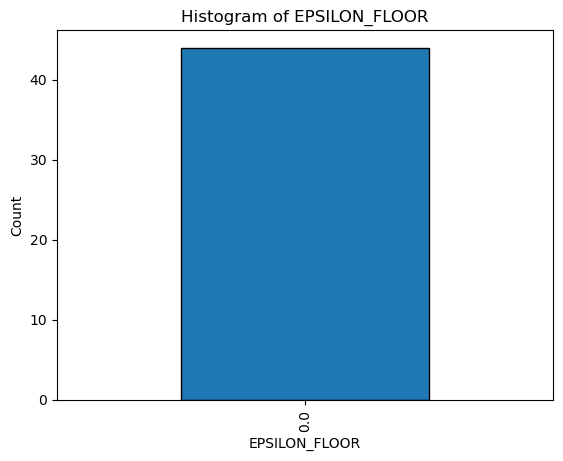

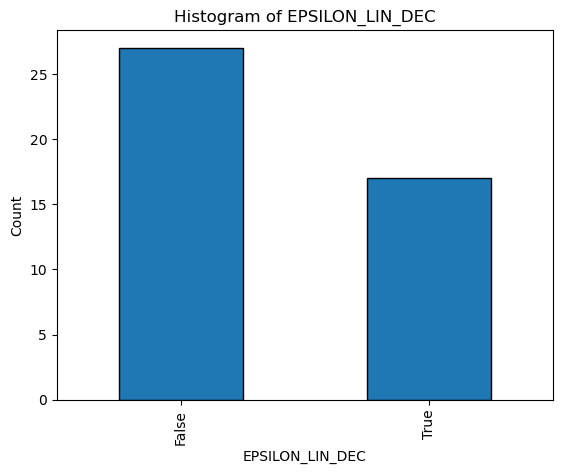

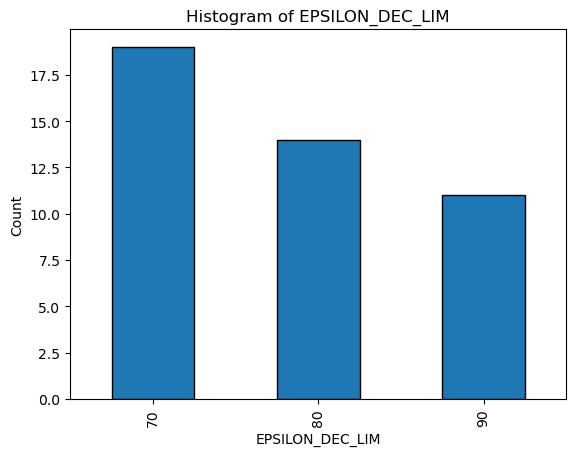

In [176]:
plot_agent_strings_params(gamma_0p7)

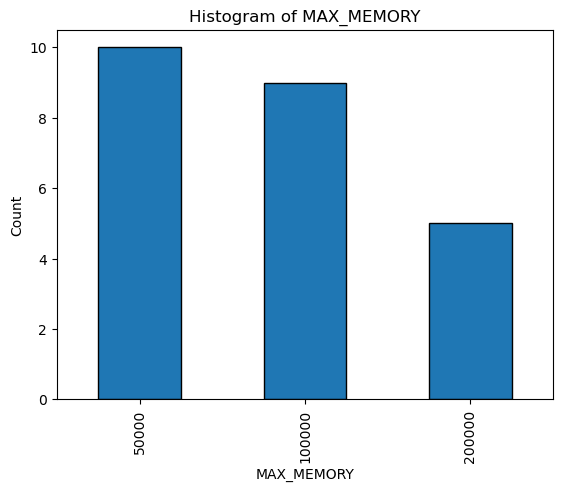

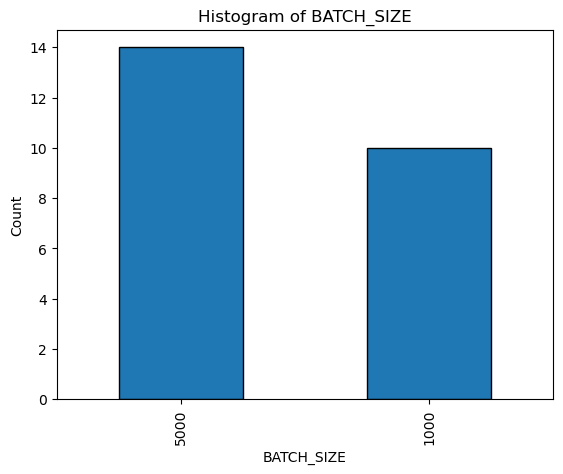

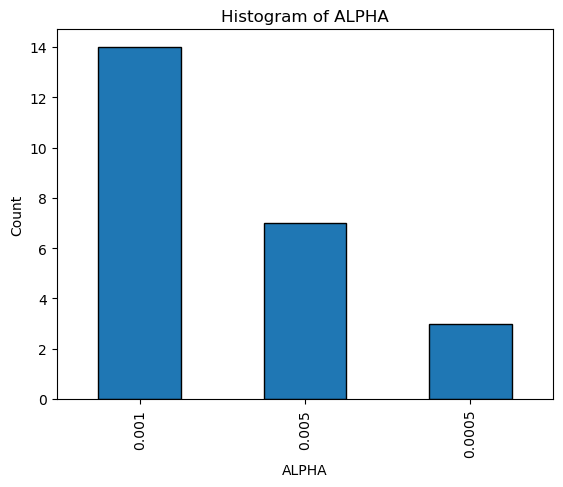

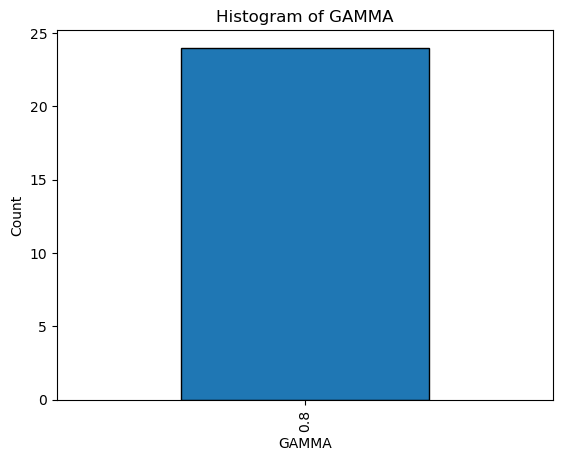

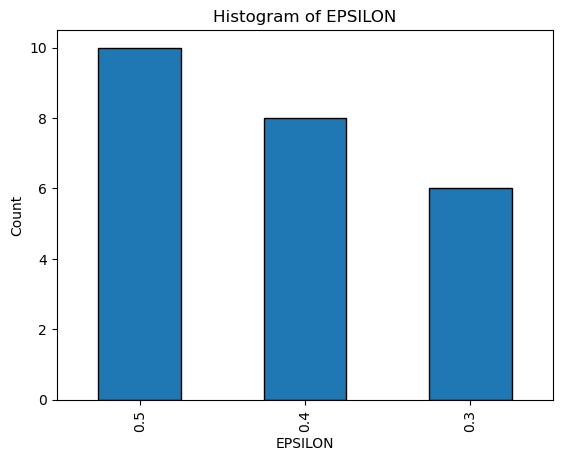

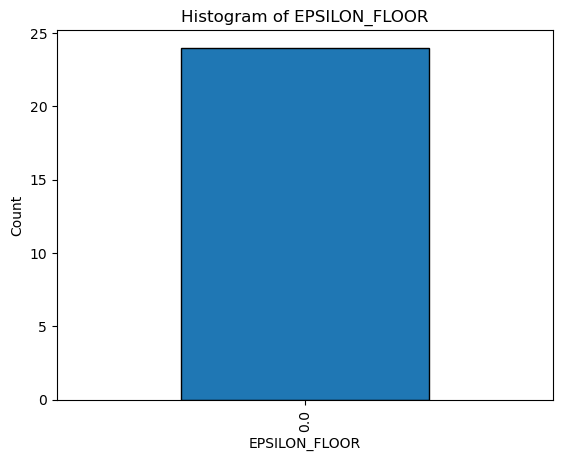

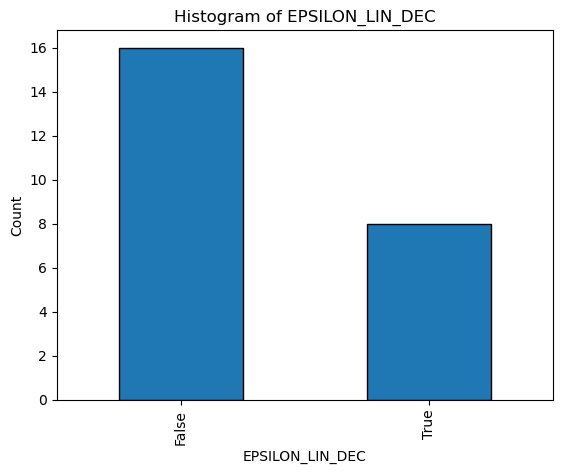

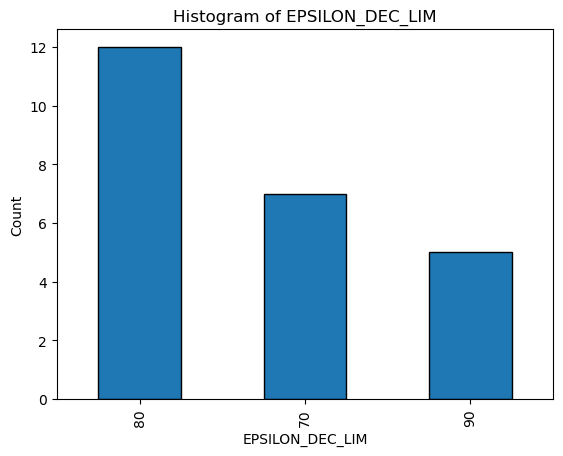

In [178]:
plot_agent_strings_params(gamma_0p8)

In [191]:
# stratify based on EPSILON
str_to_analyze = broad_df.index
eps_0p5 = []
eps_0p4 = []
eps_0p3 = []
for st in str_to_analyze:
  if "EPSILON=0.5" in st:
    eps_0p5.append(st)
  elif "EPSILON=0.4" in st:
    eps_0p4.append(st)
  elif "EPSILON=0.3" in st:
    eps_0p3.append(st)

assert(len(eps_0p5)+len(eps_0p4)+len(eps_0p3) == len(str_to_analyze))

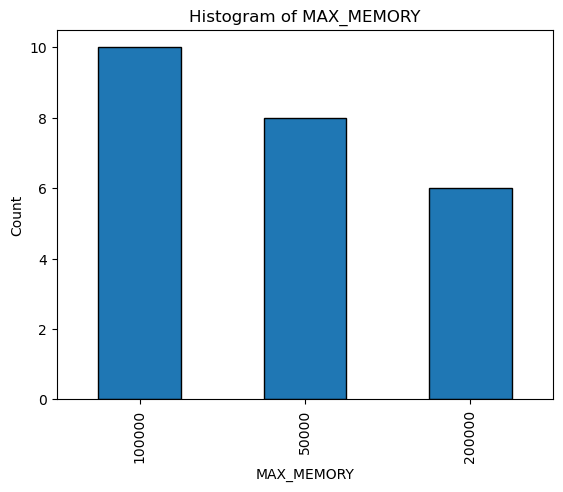

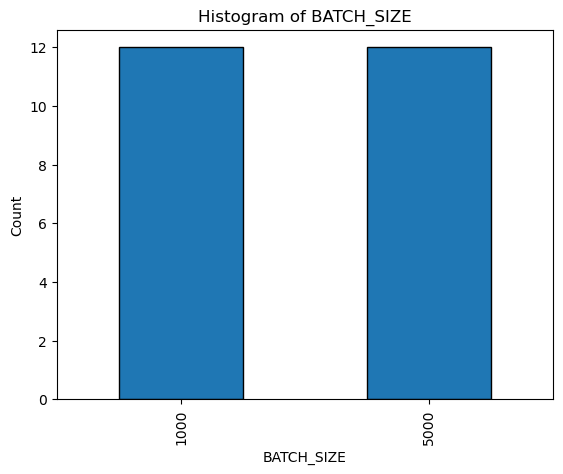

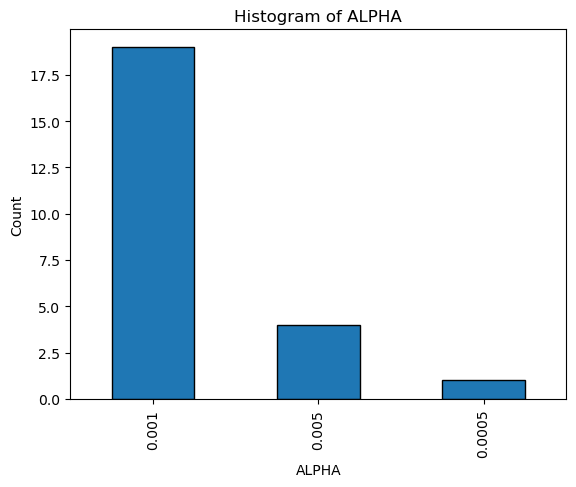

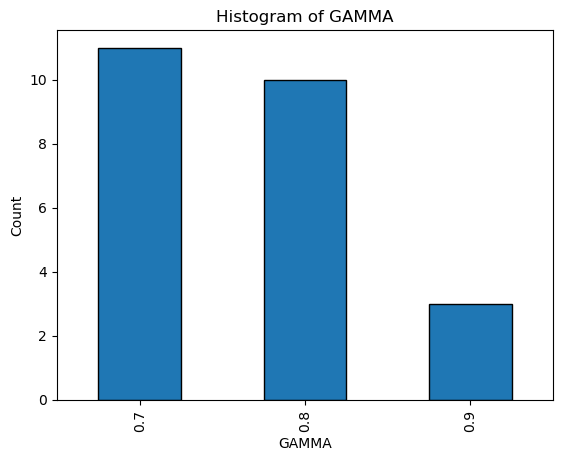

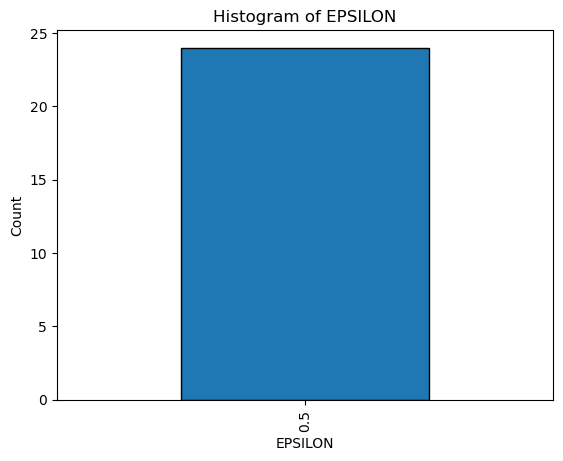

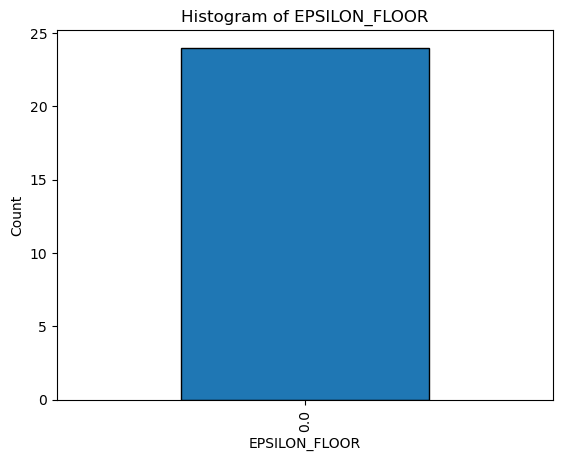

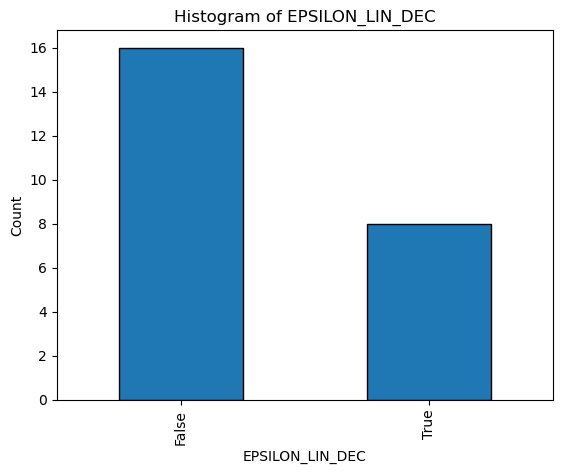

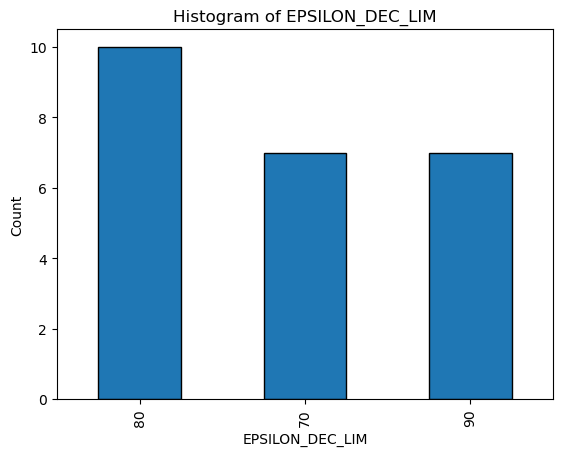

In [192]:
plot_agent_strings_params(eps_0p5)

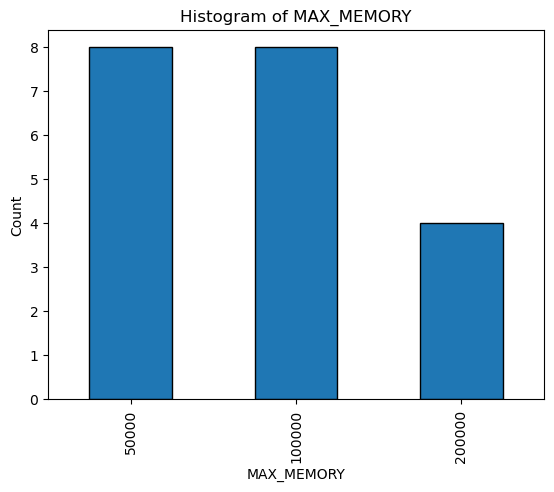

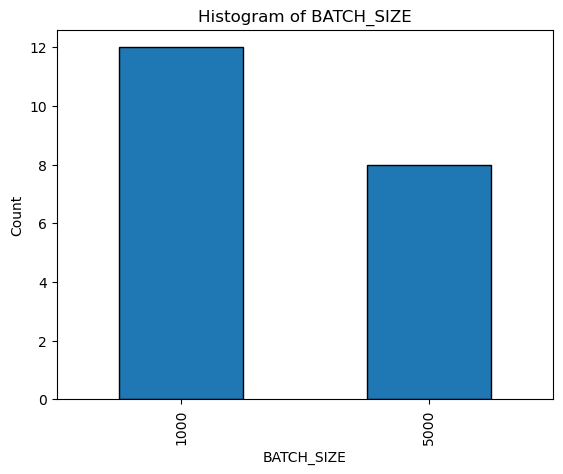

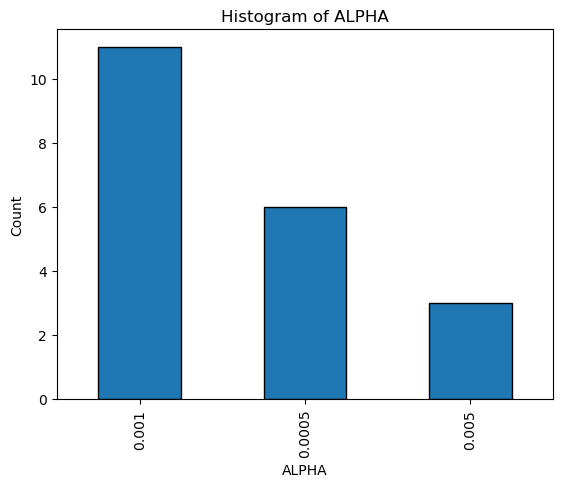

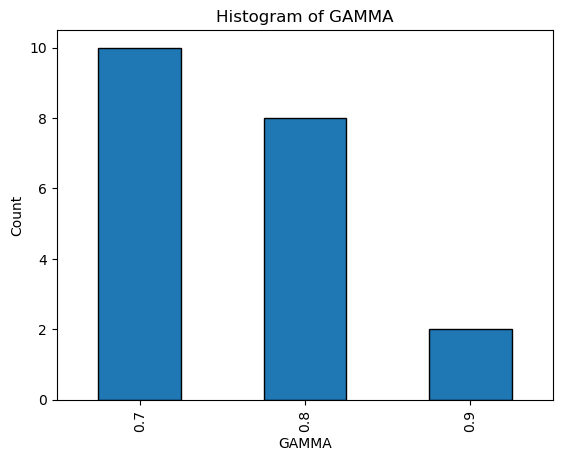

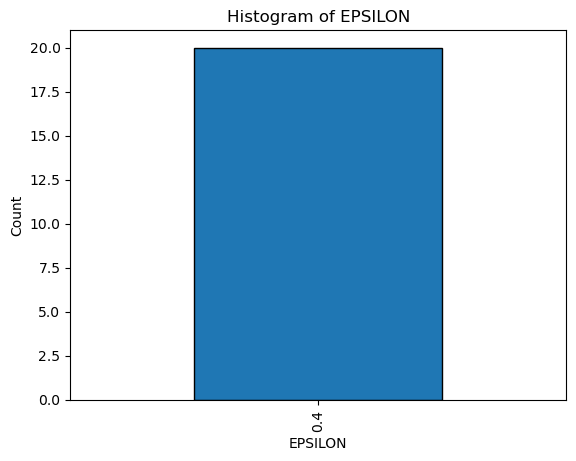

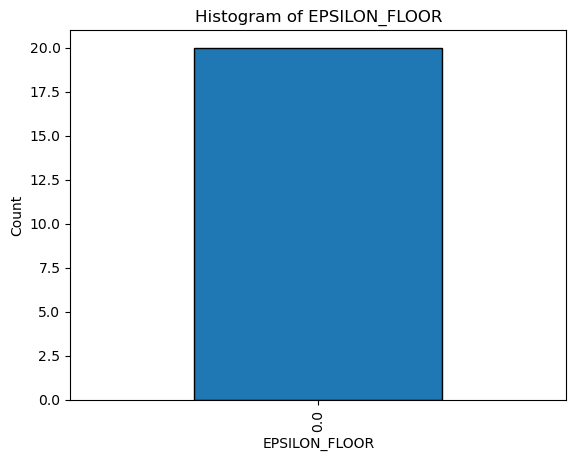

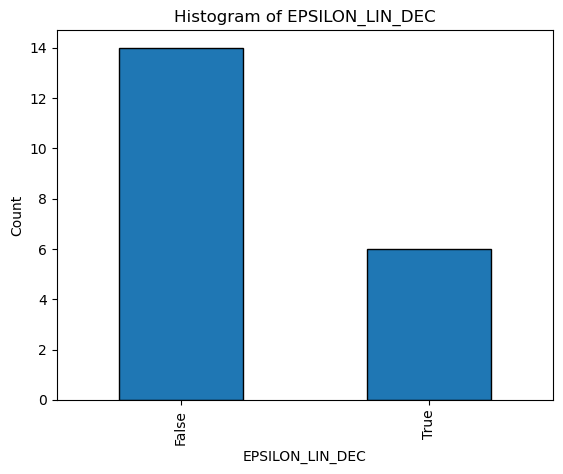

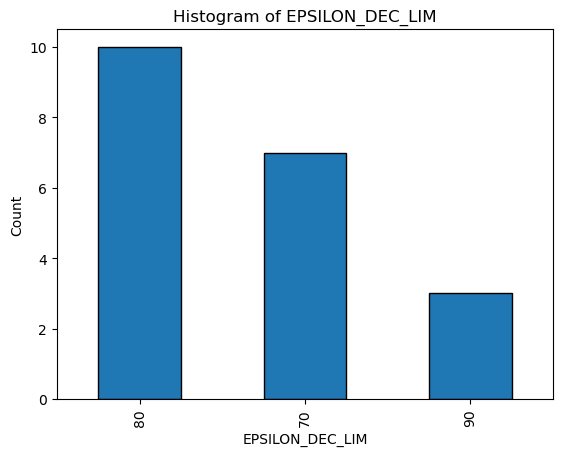

In [193]:
plot_agent_strings_params(eps_0p4)

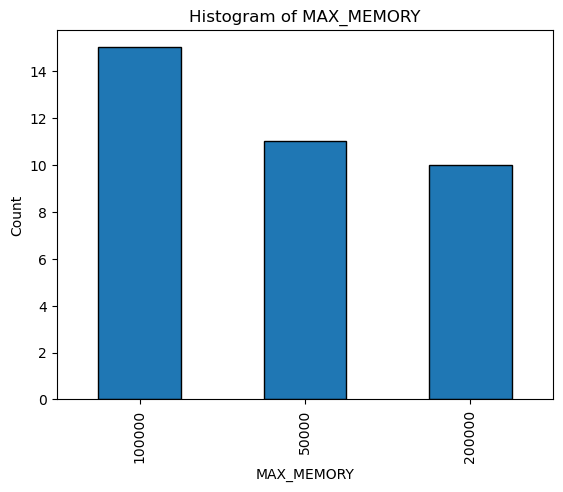

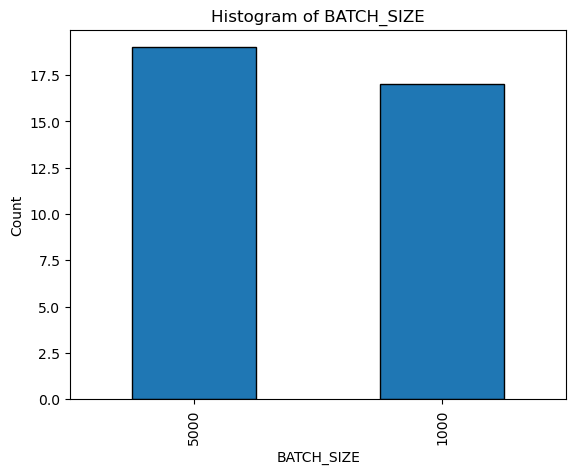

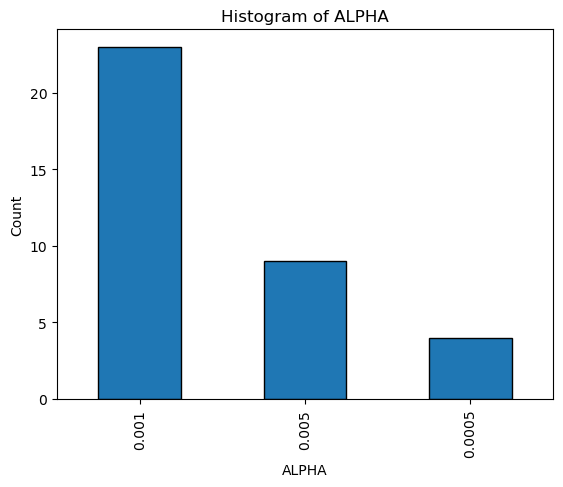

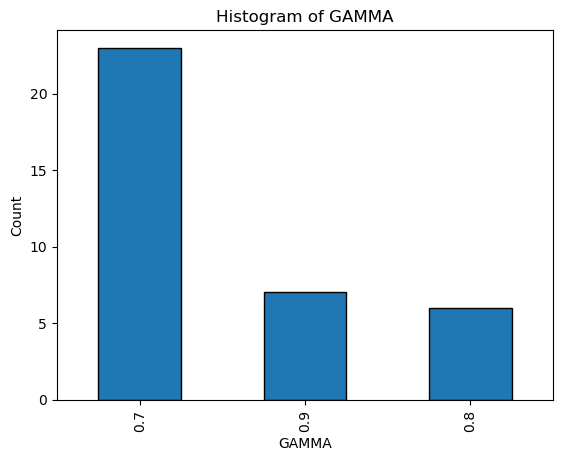

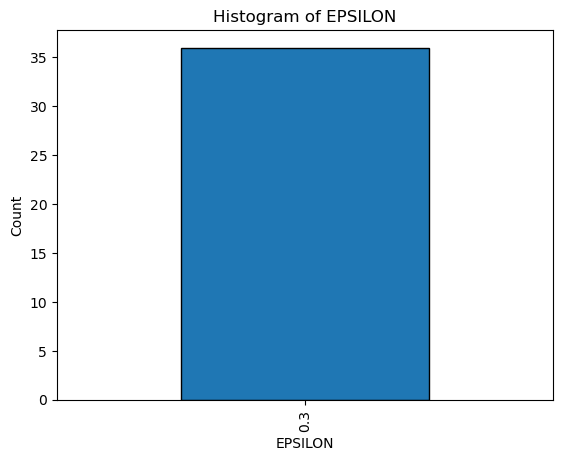

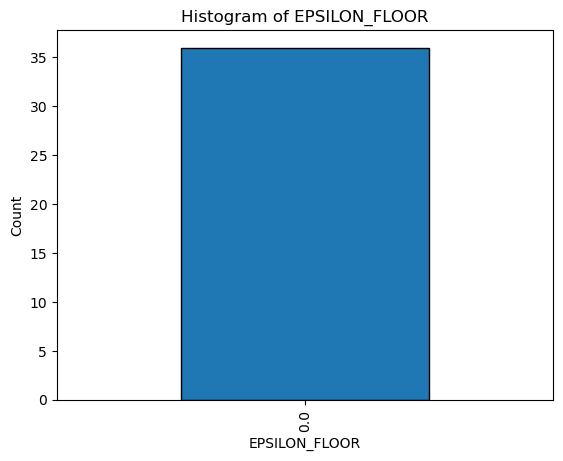

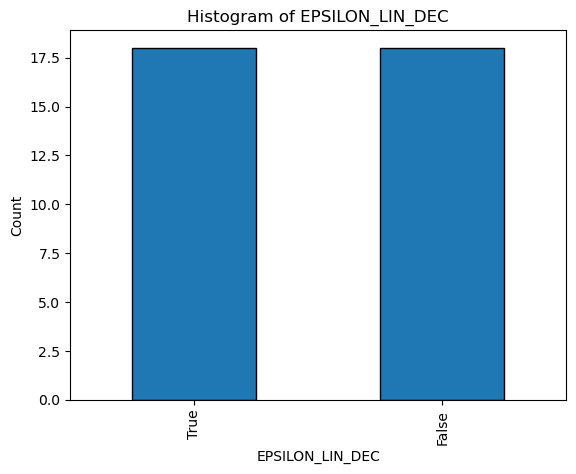

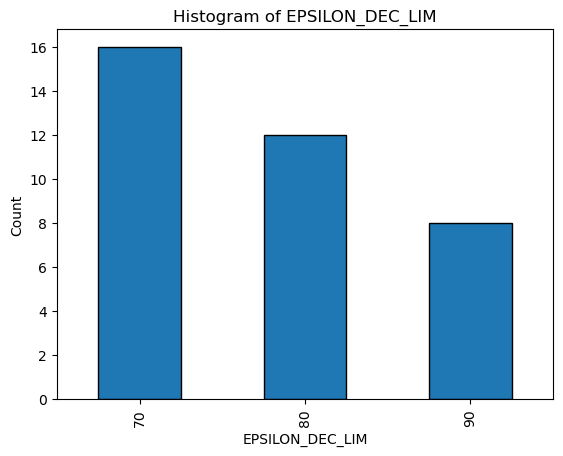

In [194]:
plot_agent_strings_params(eps_0p3)

## Hyperparameter Observations:
* MAX_MEMORY is too big...
    * given that `total_num_frames` < `MAX_MEMORY`, makes no difference
    * did some independent tests, which suggests that no performance difference when `total_num_frames` > `MAX_MEMORY`
    * so might as well make smaller for light-weight multi-threading...
* `BATCH_SIZE` is also pretty big... I think can have preference for smaller size and more "focused" memory
    * when `MAX_MEMORY` is 200000, then preference for 5000, else 1000 ... makes sense
    * since we are making `MAX_MEMORY` smaller, there is no point in interpolating `BATCH_SIZE`
* `ALPHA` = 0.001 seems to perform better with `GAMMA = 0.7` 
* `GAMMA` = 0.7 seems to perform better `EPSILON` = 0.3, whereas `GAMMA` = 0.8 just barely seems to perform better with `EPSILON` = 0.5 and 0.4... so let's stick with `GAMMA`=0.7 due to its nice `ALPHA`=0.001 compatability (which seems to be the most frequent performant `ALPHA` value
* `EPSILON` = 0.5 and 0.4 seems to perform better with exponential decay, whereas 0.3 seems to perform well with both... so let's stick with exponential delay 
    * should always to decay 0.0, as 4% floor for epsilon doesn't seem helpful for long-term performance